### Import de bibliotecas

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

### Execução

In [2]:
node_df = pd.read_excel('scientists.xlsx', sheet_name='Nós')
edge_df = pd.read_excel('scientists.xlsx', sheet_name='Arestas')

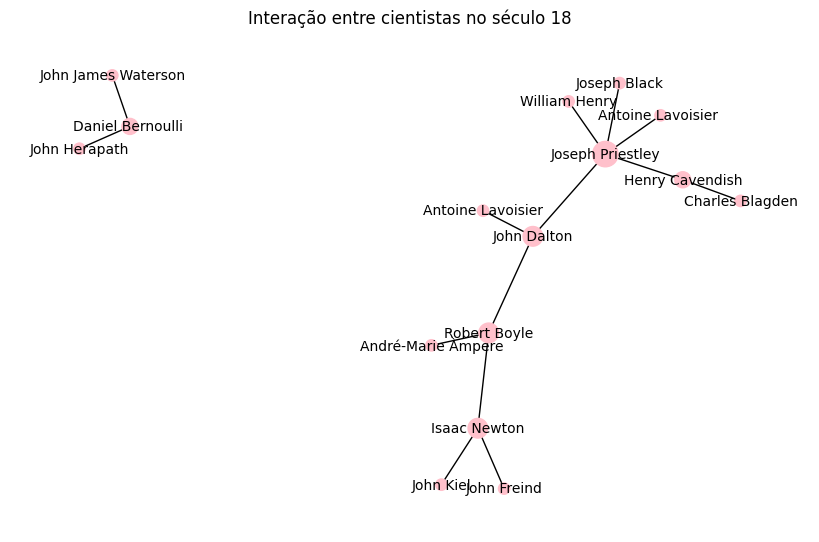

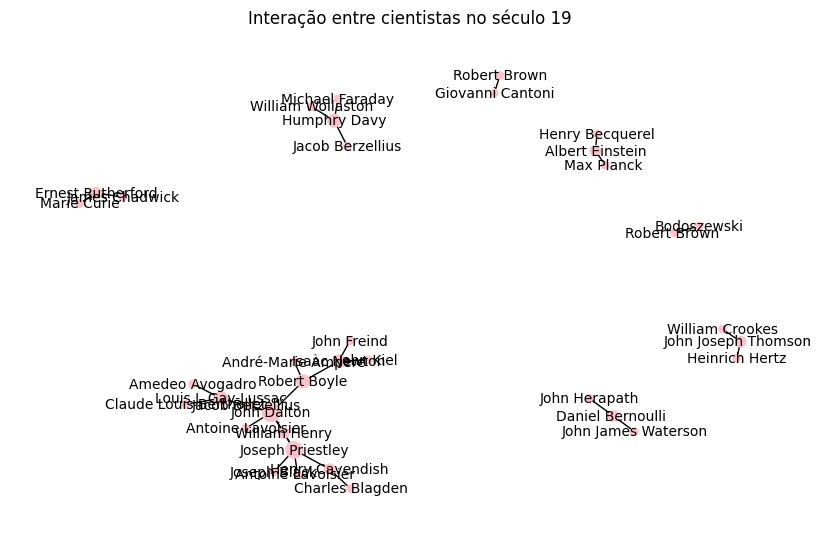

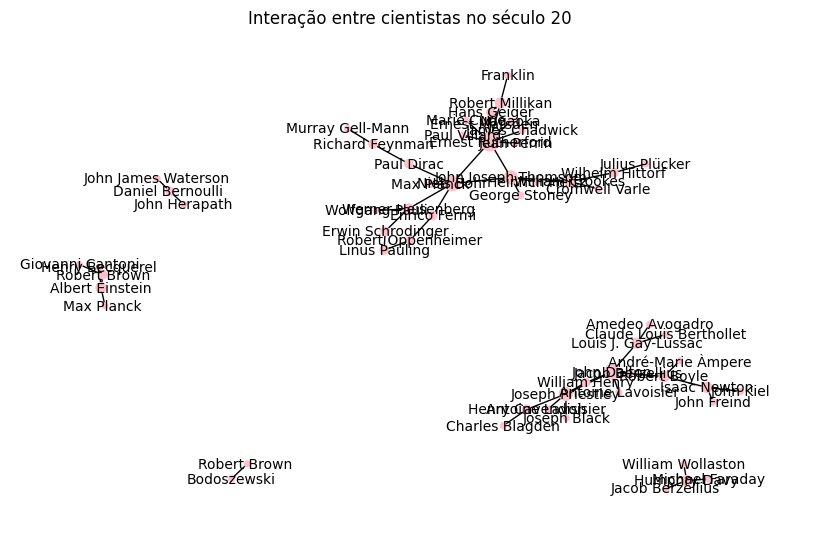

In [ ]:
G = nx.Graph()

edge_sec = edge_df.groupby(['Seculo_Interacao'])
sort_degree = []

for name, group in edge_sec:
    if isinstance(name, tuple):
        name = name[0]
    for _, row in group.iterrows():
        unique_scientist = group['Cientista_Origem'].unique()
        for scientist in unique_scientist:
            G.add_node(scientist)
        G.add_edge(row['Cientista_Origem'], row['Cientista_Destino'])

    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)

# for key, value in degree_centrality.items():
#     sort_degree.append((key, value))

#     sort_degree.sort(key=lambda x: x[1], reverse=True)

    node_sizes = [degree_centrality[node] * 1000 for node in G.nodes()]
    plt.figure(figsize=(8, 5))
    nx.draw(G, with_labels=True, node_size=node_sizes, node_color='pink', font_size=10)
    plt.title(f"Interação entre cientistas no século {name}")
    plt.show()